In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('measures_v2.csv')



# Select input features (include coolant)
input_features = ['i_d', 'i_q', 'motor_speed', 'u_q', 'torque', 'coolant']
target = 'stator_winding'

X = df[input_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error  # ✅ Add this line

# Create Polynomial Regression Pipeline (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train
poly_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test)

# Evaluate
print("\n📈 Polynomial Regression (degree=2):")
print("✅ R² Score:", r2_score(y_test, y_pred_poly))
print("✅ RMSE:", mean_squared_error(y_test, y_pred_poly, squared=False))



📈 Polynomial Regression (degree=2):
✅ R² Score: 0.8138205806363439
✅ RMSE: 12.369687612413918


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


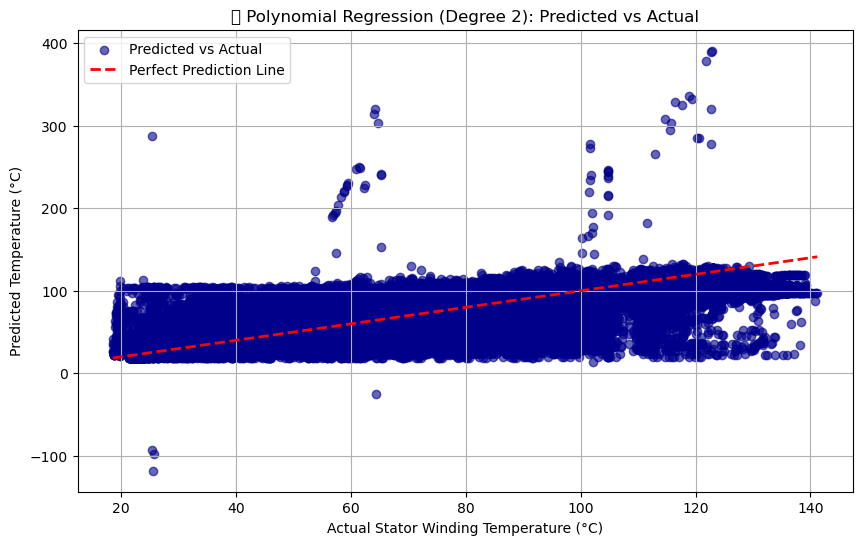

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='darkblue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Stator Winding Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('📈 Polynomial Regression (Degree 2): Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()
